# Welcome to the Kotlin Notebook!

## Basics

Let's start with something simple: execute a cell with a simple arithmetics and immediately see the result.

In [1]:
2 + 2

4

Execution results could be saved in variables and reused

In [2]:
val result = 3 * 14

In [3]:
result

42

In [4]:
(Out[3] as Int) / 2

21

Variables defined in the notebook can lose their nullability if they are not actually nulls

In [5]:
val a1: Int = 1
val a2: Int? = 2
val a3: Int? = null

In [6]:
a1 + a2 // OK, a2 was converted to Int

3

In [7]:
a1 + a3 // compile-time error

Line_9.jupyter.kts (1:6 - 8) Type mismatch: inferred type is Int? but Int was expected

## Rich outputs

Outputs might be not only plain text. They could also be images and HTML. HTML can contain CSS and JavaScript.

In [8]:
HTML("""
    <p>Counter: <span id="ctr">0</span> <button onclick="inc()">Increment</button></p>
    <script>
      function inc() {
        let counter = document.getElementById("ctr")
        counter.innerHTML = parseInt(counter.innerHTML) + 1;
      }
    </script>
""")

Counter: 0 Increment

**NB!** If your outputs contain JS, notebook should be marked as trusted.

![trusted-notebook](screenshots/screenshot3.png)

Images could be loaded by link. In this case, it won't show if the link breaks or if you lose Internet connection

In [9]:
%use lib-ext

In [10]:
Image("https://kotlinlang.org/docs/images/kotlin-logo.png", embed = false).withWidth(300)

You can also embed images. In this case they will stay in the notebook forever


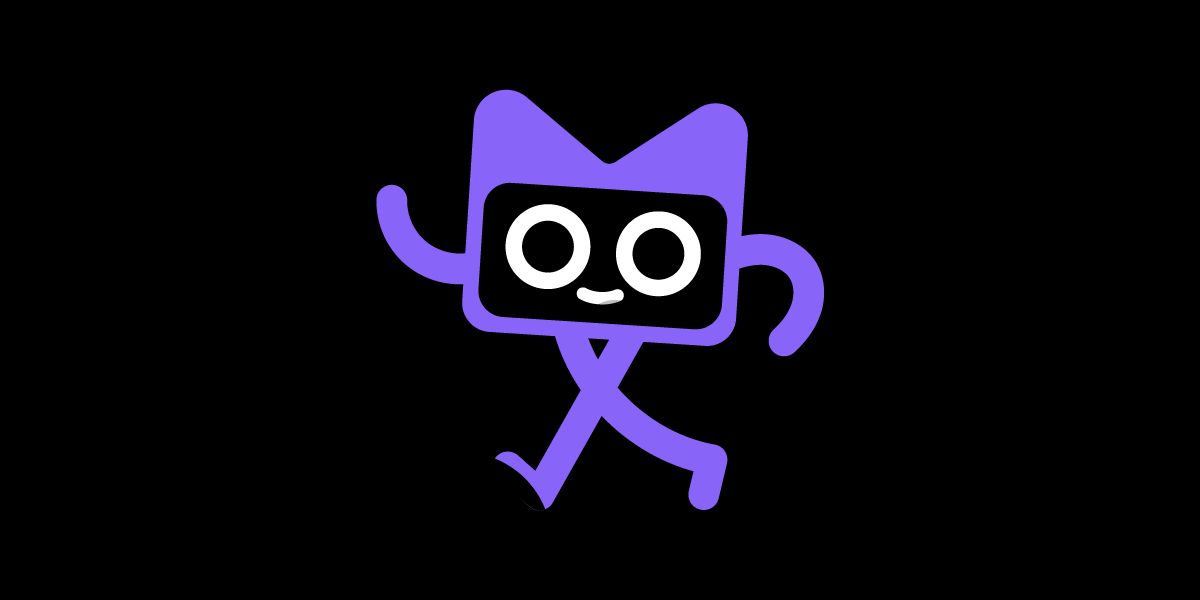

In [11]:
val kotlinMascot = Image("https://blog.jetbrains.com/wp-content/uploads/2023/04/DSGN-16174-Blog-post-banner-and-promo-materials-for-post-about-Kotlin-mascot_3.png", embed = true).withWidth(400)
kotlinMascot

The cell can also have several outputs, to achieve it use `DISPLAY()` function

Kodee is back!


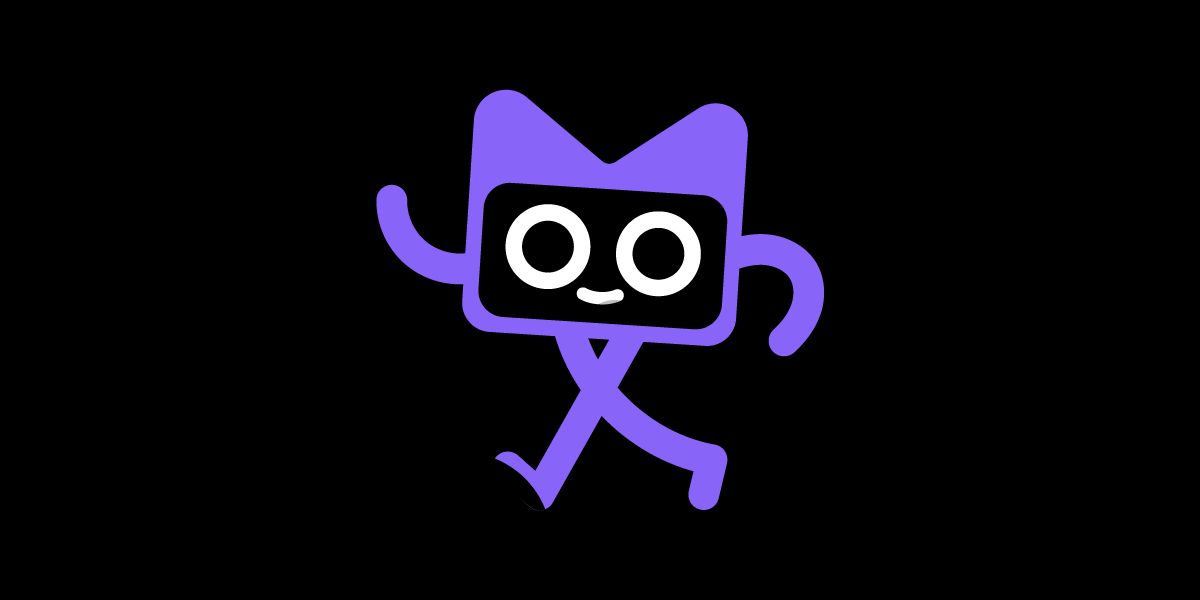

In [12]:
DISPLAY(HTML("<h2>Kodee is back!</h2>"))
DISPLAY(kotlinMascot)

With Kotlin Notebook, you can also render LaTeX formulae

In [13]:
LATEX("c^2 = a^2 + b^2 - 2 a b \\cos\\alpha")

You can also output BufferedImage's. They are embedded into notebook

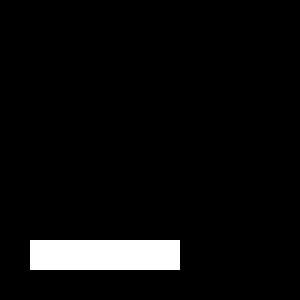

In [14]:
import java.awt.Color
import java.awt.image.BufferedImage

val width = 300
val height = width

val image = BufferedImage(width, height, BufferedImage.TYPE_INT_ARGB)

val graphics = image.createGraphics()
graphics.background = Color.BLACK
graphics.clearRect(0, 0, width, height)
graphics.setRenderingHint(
    java.awt.RenderingHints.KEY_ANTIALIASING,
    java.awt.RenderingHints.VALUE_ANTIALIAS_ON
)
graphics.color = Color.WHITE
graphics.fillRect(width / 10, height * 8 / 10, width * 10 / 20, height / 10)
graphics.dispose()

image

Generally, you can display any output using `mimeResult` function.
We're using [Jupyter approach](https://docs.jupyter.org/en/latest/reference/mimetype.html) for outputs.

In [15]:
mimeResult(
    MimeTypes.PLAIN_TEXT to "JetBrains logo",
    MimeTypes.HTML to "<b>JetBrains</b> logo"
)

JetBrains logo

## Using libraries and dependencies

You can always turn on source and binary dependencies of a current project.
To do it, use the corresponding button in the toolbar.

In [16]:
import java.io.File
import javax.imageio.ImageIO

fun showScreenshot(id: Any) {
    DISPLAY(ImageIO.read(File("screenshots/screenshot$id.png")))
}

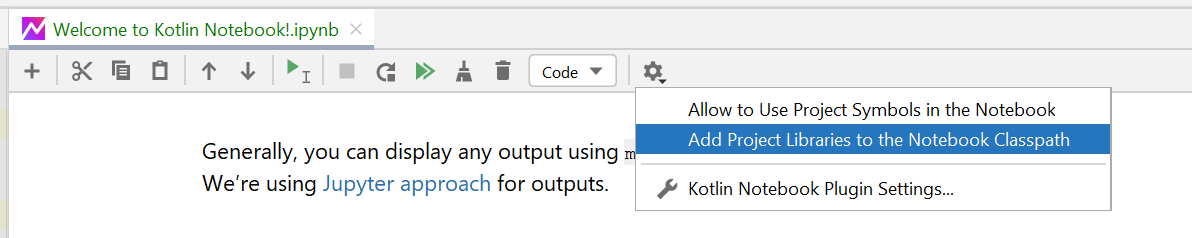

In [17]:
showScreenshot(1)

It is also possible to set these options for the newly created notebooks

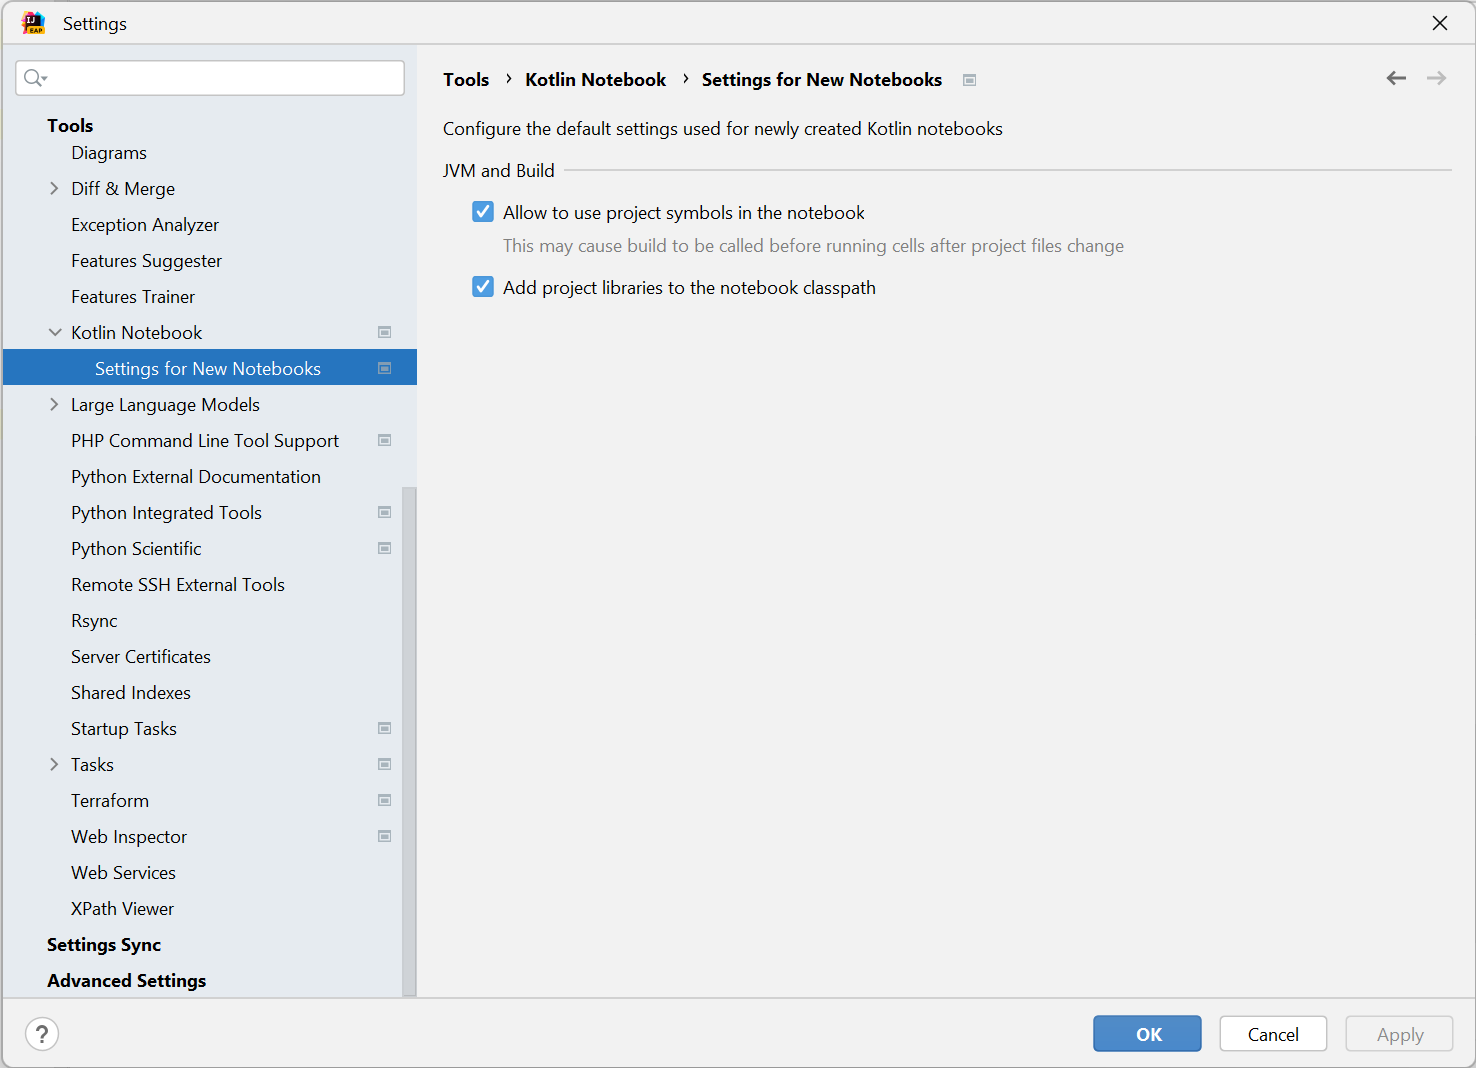

In [18]:
showScreenshot(2)

Of course, you can depend on various JVM libraries even if you don't have a project in the current scope.
The simpliest option we offer is to use predefined library descriptors, you can find which are available using `:help` command or [here](https://github.com/Kotlin/kotlin-jupyter#list-of-supported-libraries).

In [19]:
:help

Kotlin Jupyter kernel.
Kernel version: 0.11.0.381
Kotlin version: 1.8.20
JVM version: 11

Commands:
    :help - display help
    :classpath - show current classpath
    :vars - get visible variables values

Magics:
    %use - injects code for supported libraries: artifact resolution, default imports, initialization code, type renderers
        Usage: %use klaxon(5.5), lets-plot
    %trackClasspath - logs any changes of current classpath. Useful for debugging artifact resolution failures
        Usage: %trackClasspath [on|off]
    %trackExecution - logs pieces of code that are going to be executed. Useful for debugging of libraries support
        Usage: %trackExecution [all|generated|off]
    %useLatestDescriptors - use latest versions of library descriptors available. By default, bundled descriptors are used. Note that default behavior is preferred: latest descriptors versions might be not supported by current version of kernel. So if you care about stability of the notebook, avoid us

Let's try `kotlinx.serialization` library

In [20]:
%use serialization

It allows us to serialize and deserialize classes.

In [21]:
import kotlinx.serialization.Serializable

@Serializable
class User(val firstName: String, val lastName: String)

In [22]:
val bob = User("Alex", "Green")

In [23]:
Json { prettyPrint = true }.encodeToString(bob)

{
    "firstName": "Alex",
    "lastName": "Green"
}

It is possible to specify descriptors' and underlying libraries' versions, write and contribute your own descriptors and much more.
You can read about it [here](https://github.com/Kotlin/kotlin-jupyter/blob/master/docs/libraries.md)

Also, you can add dependencies for any Maven libraries you want

In [24]:
USE {
    repositories {
        // Any additional repositories. Maven central is already included
        // maven("<url>")
    }
    dependencies {
        // Here we add kandy plotting library
        implementation("org.jetbrains.kotlinx:kandy-lets-plot:0.4.1")
    }

    // Sometimes library integration are loaded transitively and you don't want them to do it.
    discardIntegrationTypeNameIf {
        it.startsWith("org.jetbrains.kotlinx.dataframe.")
    }
}

In [25]:
import kotlin.random.Random

fun diceNTimesSum(n: Int): Int {
    return (1..n).sumOf { Random.nextInt(1, 7) }
}

val experimentData = (1..100000).map { diceNTimesSum(50) }.groupBy { it }.mapValues { it.value.size }.entries.sortedBy { it.key }
val experimentX = experimentData.map { it.key }
val experimentY = experimentData.map { it.value }

val gaussPlot = plot {
    bars {
        x(experimentX)
        y(experimentY)
    }
}
gaussPlot

In [26]:
gaussPlot::class

class org.jetbrains.kotlinx.kandy.ir.Plot

As you can see kandy's `Plot` object was rendered to some image. That's because `kandy` library defines a **renderer** for this type of objects. We also can define renderers.

In [27]:
%use dataframe

In [28]:
val bob = User("Bob", "Brown")
bob

Line_23_jupyter$User@2e18b5ec

In [29]:
USE {
    // Match is based on runtime type here, beware of type erasure
    render<User> { listOf(it).toDataFrame() }
}

In [30]:
bob

<iframe onload="o_resize_iframe_out_1()" style="width:100%;" class="result_container" id="iframe_out_1" frameBorder="0" srcdoc=" <html>
 <head>
 <style type="text/css">
 :root {
 --background: #fff;
 --background-odd: #f5f5f5;
 --background-hover: #d9edfd;
 --header-text-color: #474747;
 --text-color: #848484;
 --text-color-dark: #000;
 --text-color-medium: #737373;
 --text-color-pale: #b3b3b3;
 --inner-border-color: #aaa;
 --bold-border-color: #000;
 --link-color: #296eaa;
 --link-color-pale: #296eaa;
 --link-hover: #1a466c;
}

:root[theme="dark"], :root [data-jp-theme-light="false"], .dataframe_dark{
 --background: #303030;
 --background-odd: #3c3c3c;
 --background-hover: #464646;
 --header-text-color: #dddddd;
 --text-color: #b3b3b3;
 --text-color-dark: #dddddd;
 --text-color-medium: #b2b2b2;
 --text-color-pale: #737373;
 --inner-border-color: #707070;
 --bold-border-color: #777777;
 --link-color: #008dc0;
 --link-color-pale: #97e1fb;
 --link-hover: #00688e;
}

p.dataframe_description {
 color: var(--text-color-dark);
}

table.dataframe {
 font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
 font-size: 12px;
 background-color: var(--background);
 color: var(--text-color-dark);
 border: none;
 border-collapse: collapse;
}

table.dataframe th, td {
 padding: 6px;
 border: 1px solid transparent;
 text-align: left;
}

table.dataframe th {
 background-color: var(--background);
 color: var(--header-text-color);
}

table.dataframe td {
 vertical-align: top;
}

table.dataframe th.bottomBorder {
 border-bottom-color: var(--bold-border-color);
}

table.dataframe tbody > tr:nth-child(odd) {
 background: var(--background-odd);
}

table.dataframe tbody > tr:nth-child(even) {
 background: var(--background);
}

table.dataframe tbody > tr:hover {
 background: var(--background-hover);
}

table.dataframe a {
 cursor: pointer;
 color: var(--link-color);
 text-decoration: none;
}

table.dataframe tr:hover > td a {
 color: var(--link-color-pale);
}

table.dataframe a:hover {
 color: var(--link-hover);
 text-decoration: underline;
}

table.dataframe img {
 max-width: fit-content;
}

table.dataframe th.complex {
 background-color: var(--background);
 border: 1px solid var(--background);
}

table.dataframe .leftBorder {
 border-left-color: var(--inner-border-color);
}

table.dataframe .rightBorder {
 border-right-color: var(--inner-border-color);
}

table.dataframe .rightAlign {
 text-align: right;
}

table.dataframe .expanderSvg {
 width: 8px;
 height: 8px;
 margin-right: 3px;
}

table.dataframe .expander {
 display: flex;
 align-items: center;
}

/* formatting */

table.dataframe .null {
 color: var(--text-color-pale);
}

table.dataframe .structural {
 color: var(--text-color-medium);
 font-weight: bold;
}

table.dataframe .dataFrameCaption {
 font-weight: bold;
}

table.dataframe .numbers {
 color: var(--text-color-dark);
}

table.dataframe td:hover .formatted .structural, .null {
 color: var(--text-color-dark);
}

table.dataframe tr:hover .formatted .structural, .null {
 color: var(--text-color-dark);
}




:root {
 --scroll-bg: #f5f5f5;
 --scroll-fg: #b3b3b3;
}
:root[theme="dark"], :root [data-jp-theme-light="false"]{
 --scroll-bg: #3c3c3c;
 --scroll-fg: #97e1fb;
}
body {
 scrollbar-color: var(--scroll-fg) var(--scroll-bg);
}
body::-webkit-scrollbar {
 width: 10px; /* Mostly for vertical scrollbars */
 height: 10px; /* Mostly for horizontal scrollbars */
}
body::-webkit-scrollbar-thumb {
 background-color: var(--scroll-fg);
}
body::-webkit-scrollbar-track {
 background-color: var(--scroll-bg);
}
 </style>
 </head>
 <body>
 
<table class="dataframe" id="df_-2046820352"></table>

<p class="dataframe_description">DataFrame: rowsCount = 1, columnsCount = 2</p>

 </body>
 <script>
 (function () {
 window.DataFrame = window.DataFrame || new (function () {
 this.addTable = function (df) {
 let cols = df.cols;
 for (let i = 0; i < cols.length; i++) {
 for (let c of cols[i].children) {
 cols[c].parent = i;
 }
 }
 df.nrow = 0
 for (let i = 0; 

We can also use full syntax for defining renderers. It's verbose but let you do many things

In [31]:
class User2(val name: String)

In [32]:
USE {
    addRenderer(object : RendererHandler {
        override fun replaceVariables(mapping: Map<String, String>): RendererHandler {
            return this
        }

        override val execution: ResultHandlerExecution
            get() = ResultHandlerExecution { host, res ->
                FieldValue("Value of ${res.name} is a user with name ${(res.value as User2).name}", null)
            }

        override fun accepts(value: Any?): Boolean {
            return value != null && value::class == User2::class
        }
    })
}

In [33]:
User2("XZY")

Value of res42 is a user with name XZY